In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd

# Start a Spark session.
spark = SparkSession.builder.appName('Assessment').getOrCreate()

# Task 1 – Analysis of Nuclear Plants dataset

In [2]:
# Load the dataset into a dataframe.
df = pd.read_csv('nuclear_plants_small_dataset.csv')

In [3]:
# Check for missing values.
print(df.isnull().sum())

Status                   0
Power_range_sensor_1     0
Power_range_sensor_2     0
Power_range_sensor_3     0
Power_range_sensor_4     0
Pressure _sensor_1       0
Pressure _sensor_2       0
Pressure _sensor_3       0
Pressure _sensor_4       0
Vibration_sensor_1       0
Vibration_sensor_2       0
Vibration_sensor_3       0
Vibration_sensor_4       0
dtype: int64



Showing results for Normal.
                        min    max   mean    50%
Power_range_sensor_1   0.09  12.13   5.60   5.18
Power_range_sensor_2   0.04  11.93   6.84   6.72
Power_range_sensor_3   4.38  14.10   9.29   9.26
Power_range_sensor_4   0.15  16.36   8.70   9.24
Pressure _sensor_1     0.02  56.86  13.80  10.63
Pressure _sensor_2     0.01   9.22   3.42   3.11
Pressure _sensor_3     0.08  12.65   5.92   5.74
Pressure _sensor_4     0.01  15.11   5.59   4.26
Vibration_sensor_1     0.01  31.50   8.44   7.45
Vibration_sensor_2     0.03  34.87   9.70   8.70
Vibration_sensor_3     0.06  53.24  19.44  16.46
Vibration_sensor_4     0.08  43.23  10.93   9.49


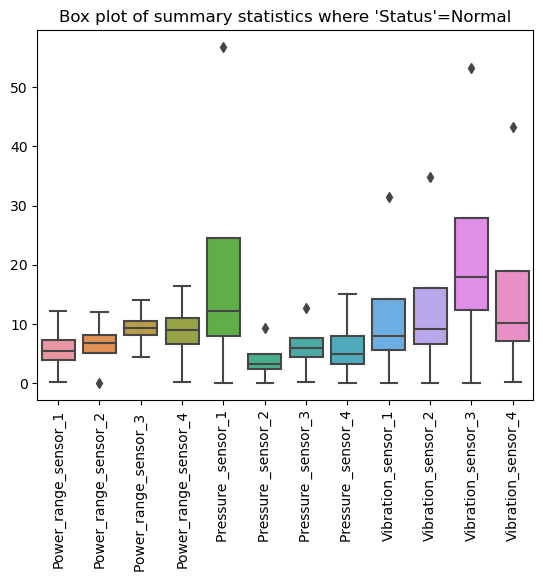


Showing results for Abnormal.
                        min    max   mean    50%
Power_range_sensor_1   0.01  10.92   4.40   4.51
Power_range_sensor_2   0.39  10.15   5.91   5.93
Power_range_sensor_3   2.58  15.76   9.16   9.47
Power_range_sensor_4   0.06  17.24   6.01   5.40
Pressure _sensor_1     0.13  67.98  14.60  12.60
Pressure _sensor_2     0.01  10.24   2.74   2.38
Pressure _sensor_3     0.00  11.77   5.58   5.74
Pressure _sensor_4     0.03  16.56   4.41   3.32
Vibration_sensor_1     0.00  36.19   7.89   6.54
Vibration_sensor_2     0.02  34.33  10.30   8.97
Vibration_sensor_3     0.13  36.91  10.94   8.99
Vibration_sensor_4     0.01  26.47   8.94   8.14


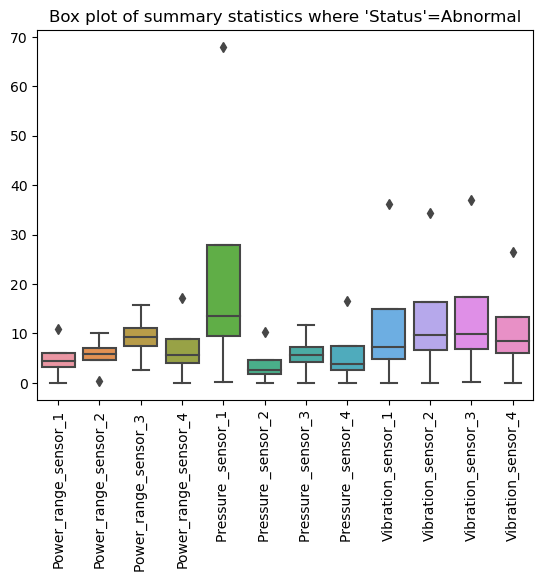

In [4]:
import matplotlib.pyplot as plt
from seaborn import boxplot
# Show summary statistics for features for all classes in the 'Status' column.
key = 'Status'
keys = df[key].unique()
for k in keys:
    print(f'\nShowing results for {k}.')
    summary = df.loc[df[key] == k].describe().T[['min', 'max', 'mean', '50%']]
    print(summary.round(2))
    # Create the box plot.
    boxplot(data=summary.transpose())
    plt.title(f'''Box plot of summary statistics where 'Status'={k}''')
    # Rotate the labels on the x-axis by 90 degrees.
    plt.xticks(rotation=90)
    plt.show()

/var/folders/_2/2ttk2yb11tn926hkgcl4rfrc0000gn/T/ipykernel_19372/2097407722.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<AxesSubplot:>

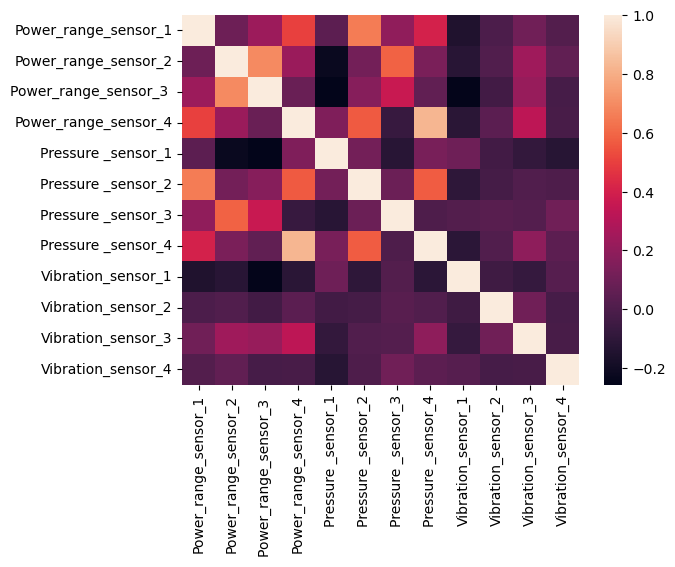

In [5]:
from seaborn import heatmap
# Create and show the correlation matrix.
correlation_matrix = df.corr()
heatmap(
    correlation_matrix, 
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns
)

In [6]:
# Training-test split.
from sklearn.model_selection import train_test_split

# Remove the target feature column from the X sets (features).
X = df.drop(key, axis=1)
y = df[key]
# Random state of 20 used to keep results the same.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [7]:
# Count samples in the split.
total_count = df.groupby([key])[key].value_counts()
print('Total count:\n', total_count)

# Counting the y sets as the X sets have had target feature column removed.
train_counts = y_train.to_frame().groupby([key]).value_counts()
test_counts = y_test.to_frame().groupby([key]).value_counts()
print('\nTraining dataset:\n', train_counts)
print('\nTesting dataset:\n', test_counts, '\n')

# Quick maths check to ensure numbers match up.
print('Check...')
for i in range(len(keys)):
    print(f'{train_counts[i]} + {test_counts[i]} = {train_counts[i]+test_counts[i]}')

Total count:
 Status    Status  
Abnormal  Abnormal    498
Normal    Normal      498
Name: Status, dtype: int64

Training dataset:
 Status
Abnormal    351
Normal      346
dtype: int64

Testing dataset:
 Status
Abnormal    147
Normal      152
dtype: int64 

Check...
351 + 147 = 498
346 + 152 = 498


In [8]:
# Train the decision tree classifier.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Train the support vector machine.
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Train the neural network.
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)

In [11]:
# Make predictions on each classifier.
dt_pred = dt.predict(X_test)
svm_pred = svm.predict(X_test)
nn_pred = nn.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, classification_report
# Print the accuracy of each classifier.
print('Overall accuracy:')
print('\tDecision tree:', accuracy_score(y_test, dt_pred).round(2))
print('\tSVM:', accuracy_score(y_test, svm_pred).round(2))
print('\tNN:', accuracy_score(y_test, nn_pred).round(2))

Overall accuracy:
	Decision tree: 0.81
	SVM: 0.76
	NN: 0.81


In [13]:
print('Classification reports:')
print('\tDecision tree:')
print(classification_report(y_test, dt_pred))

Classification reports:
	Decision tree:
              precision    recall  f1-score   support

    Abnormal       0.82      0.79      0.81       147
      Normal       0.80      0.84      0.82       152

    accuracy                           0.81       299
   macro avg       0.81      0.81      0.81       299
weighted avg       0.81      0.81      0.81       299



In [14]:
print('\tSVM:')
print(classification_report(y_test, svm_pred))

	SVM:
              precision    recall  f1-score   support

    Abnormal       0.73      0.82      0.77       147
      Normal       0.80      0.71      0.75       152

    accuracy                           0.76       299
   macro avg       0.77      0.76      0.76       299
weighted avg       0.77      0.76      0.76       299



In [15]:
print('\tNN:')
print(classification_report(y_test, nn_pred))

	NN:
              precision    recall  f1-score   support

    Abnormal       0.80      0.82      0.81       147
      Normal       0.82      0.80      0.81       152

    accuracy                           0.81       299
   macro avg       0.81      0.81      0.81       299
weighted avg       0.81      0.81      0.81       299



# Task 2 - MapReduce for Margie Travel dataset

In [16]:
sc = spark.sparkContext
# Import csv files as dataframes.
# .filter() method removes empty lines in the files.
passenger_txt = sc.textFile('AComp_Passenger_data_no_error.csv').filter(lambda x: x)
passenger_rdd = passenger_txt.map(lambda a: a.split(','))
airport_txt = sc.textFile('Top30_airports_LatLong.csv').filter(lambda x: x)
airport_rdd = airport_txt.map(lambda a: a.split(','))

## Part 1

In [17]:
# Get an uncollected count of flight IDs.
# This is important as there are multiple of the same flight within the data.
flight_map = passenger_rdd.map(lambda a: ((a[1], a[2]), 1))
flight_map_sum = flight_map.reduceByKey(lambda a,b: a+b)
flight_map_sum.take(1)

[(('SQU6245R', 'DEN'), 21)]

In [18]:
# Flight ID is disregarded and occurences are counted, now as airport codes.
airport_codes_count = flight_map_sum.map(lambda a: (a[0][1], 1))
airport_codes_sum = airport_codes_count.reduceByKey(lambda a,b: a+b)
airport_codes_sum.take(1)

[('DEN', 3)]

In [19]:
# Get airport codes and names with airport code as key (first).
airport_names_map = airport_rdd.map(lambda a: (a[1], a[0]))
# Join the RDDs.
flights_per_airport_dirty = airport_names_map.join(airport_codes_sum)
flights_per_airport_dirty.take(1)

[('ORD', ('CHICAGO', 2))]

In [20]:
# Use .map() to reformat the RDD again.
flights_per_airport_clean = flights_per_airport_dirty.map(lambda a: (a[1][0], a[1][1]))
flights_per_airport_clean_sorted = flights_per_airport_clean.sortBy(lambda a: a[1], ascending=False)
flights_per_airport_clean_sorted.take(1)

[('DENVER', 3)]

In [21]:
# Create a Pandas dataframe for viewing.
cols = ['Airport name', 'No. flights']
flights_per_airport_df = pd.DataFrame(flights_per_airport_clean_sorted.collect(), columns=cols)
flights_per_airport_df

,Airport name,No. flights
0,DENVER,3
1,CHICAGO,2
2,JAKARTA,2
3,GUANGZHOU,2
4,HOUSTON,2
5,ATLANTA,2
6,KUALA LUMPUR,2
7,LAS VEGAS,1
8,MUNICH,1
9,DALLAS/FORT WORTH,1


In [22]:
# Find unused airports.
airport_names_with_flights = flights_per_airport_clean.map(lambda a: a[0])
all_airport_names = airport_rdd.map(lambda a: a[0])
not_used_airports = all_airport_names.subtract(airport_names_with_flights)
not_used_airports_sorted = not_used_airports.sortBy(lambda a: a)

In [23]:
# Create a Pandas dataframe for viewing.
cols = ['Airports without flights']
not_used_airports_df = pd.DataFrame(not_used_airports_sorted.collect(), columns=cols)
not_used_airports_df

,Airports without flights
0,DUBAI
1,FRANKFURT
2,HONG KONG
3,ISTANBUL
4,LOS ANGELES
5,PHOENIX
6,SAN FRANCISCO
7,SINGAPORE


## Part 2

In [24]:
from datetime import datetime
# Converts Unix Epoch time to HH:MM.
def time_conversion(time: int) -> str: 
    date_time = datetime.fromtimestamp(time)  
    return date_time.strftime("%H:%M")

In [25]:
# Gets a list of flights and the number of passengers on that flight.
rdd_mapped = passenger_rdd.map(lambda x: ((x[1], x[2], x[3], x[4], x[5]), 1))
list_of_flights = rdd_mapped.reduceByKey(lambda a,b: a+b)
list_of_flights.take(1)

[(('PME8178S', 'DEN', 'PEK', '1420564409', '1322'), 18)]

In [26]:
# Flight time is given in minutes so *60 to get seconds for Unix time.
list_of_flights_mapped = list_of_flights.map(
    lambda a: (
        a[0][0],
        a[0][1],
        a[0][2],
        time_conversion(int(a[0][3])),
        time_conversion(int(a[0][3]) + int(a[0][4])*60),
        a[1]
    )
)
list_of_flights_mapped.take(1)

[('PME8178S', 'DEN', 'PEK', '17:13', '15:15', 18)]

In [27]:
# Display data in a dateframe to show as a table.
# Arrival times < depature times are for the next day.
cols = ['Flight ID', 'Origin', 'Destination', 'Departure Time', 'Arrival Time', 'No. passengers']
list_of_flights_df = pd.DataFrame(list_of_flights_mapped.collect(), columns=cols)
list_of_flights_df

,Flight ID,Origin,Destination,Departure Time,Arrival Time,No. passengers
0,PME8178S,DEN,PEK,17:13,15:15,18
1,HUR0974O,DEN,PVG,17:15,16:33,7
2,GMO5938W,LHR,PEK,17:11,10:48,25
3,DKZ3042O,MIA,SFO,17:05,02:03,11
4,QHU1140O,CDG,LAS,17:14,12:07,21
5,HZT2506M,IAH,AMS,17:12,10:36,14
6,VYW5940P,LAS,SIN,17:26,00:09,17
7,WSK1289Z,CLT,DEN,16:59,21:37,21
8,TMV7633W,CGK,DXB,17:05,07:14,15
9,FYL5866L,ATL,HKG,17:25,22:36,20


## Part 3

In [28]:
# Nautical mile calculator function.
from math import sin, cos, sqrt, atan2, radians
def nautical_miles_between(lat1, lon1, lat2, lon2):
    lat1 = float(lat1)
    lon1 = float(lon1)
    lat2 = float(lat2)
    lon2 = float(lon2)
    R = 3440.064794816613  # Earth's radius in nautical miles
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

In [29]:
# Get the flight ID, origin, and destination.
# Format (origin, flight ID).
origin_map = passenger_rdd.map(lambda a: (a[2], (a[1])))
# Format of (destination, flight ID).
destination_map = passenger_rdd.map(lambda a: (a[3], a[1]))
# Format of (code,lat,long).
airport_map = airport_rdd.map(lambda a: (a[1], (a[2], a[3])))

In [30]:
# Format of ('DEN', ('SQU6245R', ('39.861656', '-104.673178')))
origin_latlong = origin_map.join(airport_map)
# Format of ('SQU6245R', ('DEN', '39.861656', '-104.673178')))
origin_latlong_map = origin_latlong.map(lambda a: (a[1][0], ((a[0], a[1][1][0], a[1][1][1]))))

destination_latlong = destination_map.join(airport_map)
destination_latlong_map = destination_latlong.map(lambda a: (a[1][0], ((a[0], a[1][1][0], a[1][1][1]))))

# Join the origin and destination maps.
joined = origin_latlong_map.join(destination_latlong_map).distinct()
joined.take(1)

[('BER7172M',
  (('KUL', '2.745578', '101.709917'), ('LAS', '36.080056', '-115.15225')))]

In [31]:
# Calculate the distance for each flight.
miles_per_flight = joined.map(lambda a: (a[0], nautical_miles_between(a[1][0][1], a[1][0][2], a[1][1][1], a[1][1][2])))

In [32]:
# Display data in a dateframe to show as a table.
cols = ['Flight ID', 'Nautical Miles']
miles_per_flight_df = pd.DataFrame(miles_per_flight.collect(), columns=cols)
miles_per_flight_df

,Flight ID,Nautical Miles
0,BER7172M,7693.953111
1,GMO5938W,4402.109512
2,RUM0422W,807.590399
3,XOY7948U,3650.406750
4,VDC9164W,5312.029693
5,MOO1786A,765.880617
6,HUR0974O,5820.649902
7,TMV7633W,3535.134244
8,MBA8071P,2383.079316
9,FYL5866L,7288.243701


In [33]:
# Need Passenger ID and flight ID. Join on flight ID. Map by passenger ID.
flights_per_p = passenger_rdd.map(lambda a: (a[1], (a[0])))
miles_per_p_dirty = flights_per_p.join(miles_per_flight).distinct()
miles_per_p_clean = miles_per_p_dirty.map(lambda a: (a[1][0], a[1][1]))
miles_per_p = miles_per_p_clean.reduceByKey(lambda a,b: a+b)

In [34]:
# Display data in a dateframe to show as a table.
cols = ['Passenger ID', 'Total Nautical Miles Flown']
miles_per_p_df = pd.DataFrame(miles_per_p.collect(), columns=cols)
miles_per_p_df

,Passenger ID,Total Nautical Miles Flown
0,BWI0520BG6,71648.850859
1,KKP5277HZ7,34143.758201
2,HCA3158QA6,77716.974017
3,CDC0302NN5,51759.271706
4,PIT2755XC1,29069.167731
5,YMH6360YP0,66668.339667
6,ONL0812DH1,46200.986533
7,PUD8209OG3,72985.395104
8,XFG5747ZT9,54765.123033
9,WTC9125IE5,49430.431073


In [35]:
# Get max value for miles flown.
miles_per_p.sortBy(lambda a: a[1])
max_p = miles_per_p.collect()[1]
print(max_p)

('KKP5277HZ7', 34143.758200548094)


In [ ]:
# Stop the Spark session.
spark.stop()